<h1> Automatic Classification of Sexism on Social Network</h1>


In [107]:
!pip install tweepy
!pip install textblob

In [108]:
API_Key="FKHHsssxThtENJSLUeoPhjEZG"
API_Key_Secret="p43T5G920HNadfKLPsUWjTX2Wx2M9aMTqK16eoDpBpEykDybTf"
Bearer_Token= "AAAAAAAAAAAAAAAAAAAAAHGIYQEAAAAAH1e1soW2DkEA1h2dGPtXNFnGHhg%3DIxYxc4iNILtXjEtj0YzKT5XpClGRfn3BH58dTKTHL9pDm8QSlq"
Access_Token= "1484760412554149893-YAoS4Mf0fMR0nYLdJapQtuhBk6YE10"
Access_Token_Secret= "F9BRtwlLZ8WTQjy9BiUdiUiXSQzEgxVPQgnHwSkc0XQ0m"

**<h1>Importing Modules** 

In [109]:
from tweepy.streaming import StreamListener
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [110]:
auth=tweepy.OAuthHandler(API_Key,API_Key_Secret)
auth.set_access_token(Access_Token,Access_Token_Secret)
twitterAPI=tweepy.API(auth,wait_on_rate_limit=True)

**<h1>Test Case on a Known User**

In [111]:
account="BarackObama"

""" 50 recent tweets of Narendra Modi account will get retrieved and assigned to tweets variable (excludes replies)"""
tweets=tweepy.Cursor(twitterAPI.user_timeline,
                     screen_name=account,
                     count=None,
                     since_id=None,
                     max_id=None, trim_user=True, exclude_replies=True,
                     contributor_details=False,
                     include_entities=False).items(50);


**Creation of DataFrame or Table using Pandas**

In [112]:
df=pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

In [113]:
df.head()

,Tweet
0,"As we celebrate Black History Month, it’s impo..."
1,"For anyone who cares about voting rights, @Eri..."
2,"Jackie Robinson changed baseball, and paved th..."
3,"On this day thirteen years ago, I signed the L..."
4,This record-setting enrollment period was a re...


**Cleaning of Data Retrieved**

In [114]:
def cleanTweet(txt):
  txt=re.sub(r'@[A-Za-z0-9]+','',txt)
  txt=re.sub(r'#','',txt)
  txt=re.sub(r'RT: ','',txt)
  txt=re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
  return txt

In [115]:
df['Tweet']=df['Tweet'].apply(cleanTweet) #Applying Clean Tweet function to all the tweets of a user

**<h1>Using TextBlob API for getting text subjectivity and polarity**

**TextBlob**- It is a library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction,classification, translation.

We will be using this api for finding out accuracy from robust and classical ML models such as LR, KNN etc.

**Sentiment**- Sentiment in TextBlob API refers to the belief/opinion of a text. It ranges from [-1,1], where -1:Negative and 1: Positive

**Polarity**- Polarity refers to emotions expressed in a particular text. It ranges from [-1,1] where -1: Negative and 1: Positive

In [116]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

In [117]:
def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [118]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['polarity']=df['Tweet'].apply(getTextPolarity)

In [119]:
df.head(50)

,Tweet,Subjectivity,polarity
0,"As we celebrate Black History Month, it’s impo...",0.716667,0.116667
1,"For anyone who cares about voting rights, ’s n...",0.377273,0.068182
2,"Jackie Robinson changed baseball, and paved th...",0.500000,0.500000
3,"On this day thirteen years ago, I signed the L...",0.616667,0.475000
4,This record-setting enrollment period was a re...,0.541667,-0.291667
5,This week’s redistricting victory in Alabama i...,0.400000,0.800000
6,"RT : Nine years ago, we lost Hadiya Pendleton ...",1.000000,-1.000000
7,"On Holocaust Remembrance Day, we honor the vic...",0.000000,0.000000
8,The Biden Administration has set up a way for ...,0.800000,0.400000
9,"In his inaugural address one year ago today, ...",0.000000,0.000000


In [120]:
df=df.drop(df[df['Tweet']==''].index)

In [121]:
df.head(50)

,Tweet,Subjectivity,polarity
0,"As we celebrate Black History Month, it’s impo...",0.716667,0.116667
1,"For anyone who cares about voting rights, ’s n...",0.377273,0.068182
2,"Jackie Robinson changed baseball, and paved th...",0.500000,0.500000
3,"On this day thirteen years ago, I signed the L...",0.616667,0.475000
4,This record-setting enrollment period was a re...,0.541667,-0.291667
5,This week’s redistricting victory in Alabama i...,0.400000,0.800000
6,"RT : Nine years ago, we lost Hadiya Pendleton ...",1.000000,-1.000000
7,"On Holocaust Remembrance Day, we honor the vic...",0.000000,0.000000
8,The Biden Administration has set up a way for ...,0.800000,0.400000
9,"In his inaugural address one year ago today, ...",0.000000,0.000000


In [122]:
def getTextAnalysis(a):
  if a<0:
    return "Negative"
  elif a==0:
    return "Neutral"
  else:
    return "Positive"


In [123]:
df['Score']=df['polarity'].apply(getTextAnalysis)

In [124]:
df.head(50)

,Tweet,Subjectivity,polarity,Score
0,"As we celebrate Black History Month, it’s impo...",0.716667,0.116667,Positive
1,"For anyone who cares about voting rights, ’s n...",0.377273,0.068182,Positive
2,"Jackie Robinson changed baseball, and paved th...",0.500000,0.500000,Positive
3,"On this day thirteen years ago, I signed the L...",0.616667,0.475000,Positive
4,This record-setting enrollment period was a re...,0.541667,-0.291667,Negative
5,This week’s redistricting victory in Alabama i...,0.400000,0.800000,Positive
6,"RT : Nine years ago, we lost Hadiya Pendleton ...",1.000000,-1.000000,Negative
7,"On Holocaust Remembrance Day, we honor the vic...",0.000000,0.000000,Neutral
8,The Biden Administration has set up a way for ...,0.800000,0.400000,Positive
9,"In his inaugural address one year ago today, ...",0.000000,0.000000,Neutral


**<h1>Data Visualization**

In [125]:
positive_percentage=df[df["Score"]=="Positive"]
print(str(positive_percentage.shape[0]/df.shape[0]*100)+'% of positive tweets')
pos=positive_percentage.shape[0]/df.shape[0]*100

56.00000000000001% of positive tweets


In [126]:
neutral_percentage=df[df["Score"]=="Neutral"]
print(str(neutral_percentage.shape[0]/df.shape[0]*100)+'% of neutral tweets')
neu=neutral_percentage.shape[0]/df.shape[0]*100

36.0% of neutral tweets


In [127]:
negative_percentage=df[df["Score"]=="Negative"]
print(str(negative_percentage.shape[0]/df.shape[0]*100)+'% of negative tweets')
neg=negative_percentage.shape[0]/df.shape[0]*100

8.0% of negative tweets


In [128]:
explode=(0,0.1,0)
labels='Positive, Negative, Neutral'
sizes=[pos,neu,neg]
colors=['yellowgreen','red','blue']

(-1.1162672313287647,
 1.20965003587793,
 -1.1054173844636148,
 1.1507719452334908)

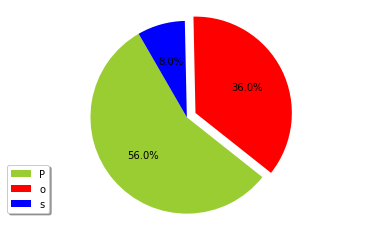

In [129]:
plt.pie(sizes,explode=explode,colors=colors,autopct="%1.1f%%",startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')